In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import Data
violation_data=pd.DataFrame(pd.read_csv("2018 Parking Data.csv"))

#Drop NAN columns 
violation_data=violation_data.drop(columns=["Unnamed: 0"])
violation_data.head()

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,YEAR,MONTH,DAY,HOUR,MINUTE,DAY OF WEEK,NUMBERED DAY OF WEEK
0,-77.033642,38.901937,4204073,P039,PARK AT EXPIRED METER,900 BLOCK 15TH ST NW EAST SIDE,TN,800554,471.0,397082,137120,2018-04-02T10:44:00.000Z,2018,4,2,10,44,Monday,0
1,-77.075907,38.935698,4204074,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,3800 BLOCK NEWARK ST NW SOUTH SI*,MD,803108,2534.0,393419,140870,2018-04-02T12:11:00.000Z,2018,4,2,12,11,Monday,0
2,-77.034818,38.900766,4204075,P302,GOVERNMENT VEHICLE PARKING ONLY,800 BLOCK VERMONT AVE NW EAST S*,MD,812519,10761.0,396980,136990,2018-04-02T17:11:00.000Z,2018,4,2,17,11,Monday,0
3,-77.036547,38.900783,4204076,P002,STAND OR PARK IN ALLEY,800 BLOCK 16TH ST NW WEST SIDE,MD,813038,11213.0,396830,136992,2018-04-02T00:00:00.000Z,2018,4,2,0,0,Monday,0
4,-77.061715,38.943166,4204077,P014,EMERGENCY NO PARKING,2900 BLOCK VAN NESS ST NW NORTH *,DC,812163,10439.0,394650,141698,2018-04-02T10:40:00.000Z,2018,4,2,10,40,Monday,0


In [13]:
violation_data["VIOLATION_DESCRIPTION"].value_counts() #re-run to see final type catagories

EXPIRED OR UNPAID METER                        198527
FAIL TO DISPLAY METER RECEIPT                  166592
NO PARKING                                     160845
NO STOPPING OR STANDING                        147876
OCCUPYING PROHIBITED SPACE                     131681
PARKED BEYOND TIME LIMIT                       110602
FAILURE TO DISPLAY OR SECURE TAGS               97456
DISOBEYING OFFICIAL SIGN                        90722
PKING BEYOND LIMIT                              45634
UNAUTHORIZED VEHICLE OR MODIFICATION            39729
INSPECTION VIOLATION                            37001
PARKED IN RESERVED SPACE                        35763
RELOCATE TOW FEE                                22444
IMPROPER PARKING                                11379
NO PERMIT                                        7723
ABANDONED OR DANGEROUS VEHICLE                   1001
TAXI VIOLATIONS                                   469
PARK IN RESERVED SPACE                             75
TAXICAB SOLICITING FARE     

In [5]:
#Data Clean-up to lump together similar violations
violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "FAIL TO DISPLAY A MULTISPACE METER RECEIPT":"FAIL TO DISPLAY METER RECEIPT",
    "FAIL DISPLAY MULTI SPACE RECEIPT PROPERLY BE":"FAIL TO DISPLAY METER RECEIPT",
    "FAILURE TO DISPLAY MULI-SPACE RECEIPT PROPERLY BZ":"FAIL TO DISPLAY METER RECEIPT",
    "FAIL TO DISPLAY MULTI-SPACE METER RECEIPT PROPERLY":"FAIL TO DISPLAY METER RECEIPT",
    "FAIL TO DISPLAY METER RECEIPT IN A LOADING ZONE":"FAIL TO DISPLAY METER RECEIPT",
    "FAIL TO DISPLAY MULTI-SPACE PARKING METER RCPT BZ":"FAIL TO DISPLAY METER RECEIPT",
    "RPP FAIL TO REMOVE EXPIRED STICKER BALLPARK EVENTS":"FAIL TO DISPLAY METER RECEIPT",
    "COMMERCIAL PMT PARK DECAL, FAIL DISPLAY PROPERLY":"FAIL TO DISPLAY METER RECEIPT",
    "DISPLAY  METER RCPT FROM MTR OUTSIDE AREA BZ":"FAIL TO DISPLAY METER RECEIPT",
    "IMPROP DISPLAY MULTISPACE RCPT IN LOADING ZONE":"FAIL TO DISPLAY METER RECEIPT",
    "RPP FAIL TO PROPERLY DISPLAY CURRENT STICKER  BZ":"FAIL TO DISPLAY METER RECEIPT",
    "FAIL TO DISPLAY MULTI SPACE RECEIPT  BALLPARKEVENT":"FAIL TO DISPLAY METER RECEIPT",})

violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "UNKNOWN":"PARKING MISC","FAIL TO CHANGE ADDRESS OF VEHICLE REGISTRATION":"PARKING MISC"})

violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT":"PARKED BEYOND TIME LIMIT",
    "OVERTIME AT A MULTISPACE METER IN A LOADING ZONE":"PARKED BEYOND TIME LIMIT",
    "IND. W/ DISABILITIES PARKED BEYOND TIME LIMIT":"PARKED BEYOND TIME LIMIT",
    "PKING BEYOND LIMIT":"PARKED BEYOND TIME LIMIT"})

violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "NO PARKING ANYTIME":"NO PARKING","EMERGENCY NO PARKING":"NO PARKING","NO PARKING SPECIFIC HOURS":"NO PARKING",
    "NO PARKING STREET CLEANING":"NO PARKING","NO PARKING 7 AM TO 6:30 PM":"NO PARKING",
    "NO PARKING EXC. ELECTRIC VEHICLE BEING CHARGED":"NO PARKING","MACHINE RESTRCTD HRS":"NO PARKING",})

violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "EXPIRATION TIME ON METER RECEIPT LAPSED":"EXPIRED OR UNPAID METER","PARK OVERTIME AT A METER":"EXPIRED OR UNPAID METER",
    "PARK AT EXPIRED METER":"EXPIRED OR UNPAID METER",
    "IND. W/ DISABILITIES METER  NO PROOF OF PAYMENT":"EXPIRED OR UNPAID METER",
    "FAIL TO REMOVE EXPIRED RESIDENTIAL PARKING PERMIT":"EXPIRED OR UNPAID METER",
    "EXPIRED HANDICAP METER":"EXPIRED OR UNPAID METER","METER, FAIL TO DEPOSIT PAYMENT":"EXPIRED OR UNPAID METER",
    "IND. W/ DISABILITIES AMOUNT OF PAYMENT HAS LAPSED":"EXPIRED OR UNPAID METER",
    "FORGED TEMPORARY PARKING PLACARD":"EXPIRED OR UNPAID METER",
    "OVERTIME PARKING IN A LOADING ZONE METER SPACE":"EXPIRED OR UNPAID METER",
    "METER BALL PARK EVENT, DEPOSIT ADDITONAL PAYMENT":"EXPIRED OR UNPAID METER",
    "DEPOSIT PAYMENT TO EXTEND TIME BEYOND METER LIMIT":"EXPIRED OR UNPAID METER",
    "OVERTIME AT METER BALLPARK EVENT":"EXPIRED OR UNPAID METER",
    "EXPIRED MULTISPACE METER RECEIPT IN LOADING ZONE":"EXPIRED OR UNPAID METER",
    "RESIDENTIAL PMT PKG 3RD OFFENSE CALENDAR YEAR":"EXPIRED OR UNPAID METER",
    "EXPIRATION TIME ON METER RECEIPT LAPSED BE":"EXPIRED OR UNPAID METER",
    "METER BALL PARK EVENT, FAIL TO DEPOSIT PAYMENT":"EXPIRED OR UNPAID METER",
    "RESIDENTIAL PMT PKG  3RD  OFFENSE BALLPARK EVENT":"EXPIRED OR UNPAID METER",
    "ILLEGAL AT METER BALL PARK EVENT":"EXPIRED OR UNPAID METER",
    "METER BALL PARK EVENT, FAIL TO DEPOSIT PAYMENT":"EXPIRED OR UNPAID METER",})

violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "NO FRONT TAGS.":"PKING BEYOND LIMIT","PARK OVERTIME IN TIMED ZONE":"PKING BEYOND LIMIT",
    "LOADING ZONE, OVERTIME PARKING BY CMV VALID DECAL":"PKING BEYOND LIMIT",
    "RPP BEYOND 2 HOUR PERIOD W/O VALID PERMIT BE":"PKING BEYOND LIMIT","OVERTIME BALL PARK EVENT":"PKING BEYOND LIMIT",
    "RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT":"PKING BEYOND LIMIT",
    "PARK MORE THAN 72 HOURS":"PKING BEYOND LIMIT","RPP BEYOND 2 HOUR PERIOD W/O VALID PERMIT BZ":"PKING BEYOND LIMIT",
    "OVERTIME AT METER BZ":"PKING BEYOND LIMIT",})

In [6]:
# Data clean-up continued 
violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "UNAUTHORIZED VEHICLE IN LOADING ZONE":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "COMMERCIAL MOTOR VEHICLE - OUT OF SERVICE":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "TINTED WINDOWS":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "TINTED WINDOWS , FAIL TO COMPLY 1ST":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "FAIL TO REGISTER APPORTIONABLE VEHICLE UNDER IRP":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "COMMERCIAL MOTOR VEHICLE - NOT OUT OF SERVICE":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "BUS LANE, UNAUTHORIZED VEHICLE PARKED IN":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "UNAUTHORIZED USE OF SPECIAL PERMIT OR TAG  (HP)":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "VEHICLE ON PRIVATE/PUBLIC PROP W/O CONSENT 3D OFF":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "INCORRECT BUMPER ON A VENDING VEHICLE":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "TORN FENDERS":"UNAUTHORIZED VEHICLE OR MODIFICATION","NO REAR BUMPER":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "NO RED FLAG ON THE END OF A LOAD":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "VENDING USING IND. W/ DISABILITIES PARK PRIVILEGES":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "DEFECTIVE MUFFLER.":"UNAUTHORIZED VEHICLE OR MODIFICATION",
    "MOTOR CARRIER VEHICLE VIOLATION OUT OF SERVICE":"UNAUTHORIZED VEHICLE OR MODIFICATION",})

violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "FAILURE TO SECURE DC TAGS":"FAILURE TO DISPLAY OR SECURE TAGS","ILLEGIBLE TAGS.":"FAILURE TO DISPLAY OR SECURE TAGS",
    "FAILURE TO DISPLAY CURRENT TAGS":"FAILURE TO DISPLAY OR SECURE TAGS",
    "OBSTRUCTED TAGS.":"FAILURE TO DISPLAY OR SECURE TAGS",
    "NO REAR TAGS.":"FAILURE TO DISPLAY OR SECURE TAGS","IMPROPERLY DISPLAYED TAGS":"FAILURE TO DISPLAY OR SECURE TAGS",
    "FAIL TO SECURE TAGS IN THE DISTRICT OF COLUMBIA":"FAILURE TO DISPLAY OR SECURE TAGS",
    "FAIL TO DISPLAY CURRENT DC VEHICLE TAGS":"FAILURE TO DISPLAY OR SECURE TAGS",
    "FAIL TO PROPERLY AFFIX VALIDATION STICKERS":"FAILURE TO DISPLAY OR SECURE TAGS",
    "IMPROPER DISPLAY OF TAGS":"FAILURE TO DISPLAY OR SECURE TAGS",})

violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "NO STANDING ANYTIME":"NO STOPPING OR STANDING","NO STOPPING OR STANDING IN AM RUSH HOUR ZONE":"NO STOPPING OR STANDING",
    "NO STOPPING OR STANDING IN PM RUSH HOUR ZONE":"NO STOPPING OR STANDING",
    "NO STANDING COMMERCIAL VEHICLE":"NO STOPPING OR STANDING","NO STOPPING OR STANDING ANYTIME":"NO STOPPING OR STANDING",
    "STOPPING, STANDING OR PARKING VEHICLE IN BIKE LANE":"NO STOPPING OR STANDING",
    "NO STOPPING ANYTIME":"NO STOPPING OR STANDING"})

In [7]:
# Data clean-up continued 
violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "PARK IN OFFICIAL PARKING PERMIT ONLY SPACE":"NO PERMIT","FAIL TO DISPLAY RESIDENTIAL PARKING PERMIT":"NO PERMIT",
    "RESIDENTIAL PMT PKG 2ND OFFENSE CALENDAR YEAR":"NO PERMIT","PROVIDE FALSE INFORMATION TO OBTAIN RPP PERMIT":"NO PERMIT",
    "FAIL TO DISPLAY RECIPROCITY STICKER":"NO PERMIT","PERMIT UNLICENSED HACKER":"NO PERMIT",
    "RESIDENTIAL PMT PKG  BALLPARK ZONE 2ND OFF CAL YR":"NO PERMIT",
    "FAIL TO OBTAIN IRP TRIP PERMIT":"NO PERMIT",
    "RPP BALLPARK ZONE 3RD OFFENSE CALENDAR YEAR":"NO PERMIT","FORGED/COUNTERFEIT  VISITOR PARKING PERMIT":"NO PERMIT"})

violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "FAIL TO DISPLAY CURRENT INSPECTION STICKER":"INSPECTION VIOLATION",
    "FAIL TO REPORT FOR INSPECTION":"INSPECTION VIOLATION","FAIL TO REPORT FOR INSPECTION.":"INSPECTION VIOLATION",
    "FAIL TO PROPERLY DISPLAY INSPECTION STICKER SIGN":"INSPECTION VIOLATION",
    "EXPIRED INSPECTION REJECTION STICKER":"INSPECTION VIOLATION","EXPIRED INSPECTION STICKER":"INSPECTION VIOLATION",})

violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 2":"ABANDONED OR DANGEROUS VEHICLE",
    "DANGEROUS VEHICLE ON PRIV/PUBLIC PROP VIOL 2":"ABANDONED OR DANGEROUS VEHICLE",
    "ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 3":"ABANDONED OR DANGEROUS VEHICLE",
    "ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 1":"ABANDONED OR DANGEROUS VEHICLE",
    "DANGEROUS VEHICLE ON PRIV/PUBLIC PROP VIOL 1":"ABANDONED OR DANGEROUS VEHICLE",
    "MOTOR CARRIER DRIVER VIOLATION OUT OF SERVICE":"ABANDONED OR DANGEROUS VEHICLE",
    "DANGEROUS VEHICLE ON PRIV/PUBLIC PROP VIOL 3":"ABANDONED OR DANGEROUS VEHICLE",
    "NO SPEEDOMETER.":"ABANDONED OR DANGEROUS VEHICLE","USE OF IMPROPER LIGHTS":"ABANDONED OR DANGEROUS VEHICLE",
    "DANGEROUS VEH ON PRIV/PUBLIC PROP S/W VIOL 1":"ABANDONED OR DANGEROUS VEHICLE",
    "DANGEROUS VEH ON PRIV/PUBLIC PROP S/W VIOL 3":"ABANDONED OR DANGEROUS VEHICLE",
    "SPILLED LOAD FROM COMMERCIAL VEHICLE":"ABANDONED OR DANGEROUS VEHICLE",
    "GLASS LEFT IN THE STREET":"ABANDONED OR DANGEROUS VEHICLE", "DEFECTIVE SPEEDOMETER.":"ABANDONED OR DANGEROUS VEHICLE",
    "NO SNOW TIRES OR CHAINS":"ABANDONED OR DANGEROUS VEHICLE","LOADS NOT SECURED":"ABANDONED OR DANGEROUS VEHICLE",
    "EXCEED GROSS WEIGHT INDICATED ON IRP REGISTRATION":"ABANDONED OR DANGEROUS VEHICLE",
    "NO REAR LIGHTS.":"ABANDONED OR DANGEROUS VEHICLE","UNSAFE TIRES":"ABANDONED OR DANGEROUS VEHICLE",
    "ABANDON VEH PRIV/PUBLIC PROP SOLID WASTE/RAT":"ABANDONED OR DANGEROUS VEHICLE",
    "UNSAFE MECHANICAL CONDITION":"ABANDONED OR DANGEROUS VEHICLE",
    "OVERSIZED VEHICLE AT METER BALL PARK EVENT":"ABANDONED OR DANGEROUS VEHICLE",
    "UNAUTHORIZED  USE IND. W/ DISABILITIES PARK PRIV":"ABANDONED OR DANGEROUS VEHICLE"})

In [8]:
# Data clean-up continued 
violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "PARKED WITHIN 25 FEET OF A STOP SIGN":"OCCUPYING PROHIBITED SPACE","PARK IN A BUS ZONE":"OCCUPYING PROHIBITED SPACE",
    "STAND OR PARK IN ALLEY":"OCCUPYING PROHIBITED SPACE","PARK AT CURB IN LOADING ZONE":"OCCUPYING PROHIBITED SPACE",
    "PARK WITHIN 5 FEET OF DRIVEWAY OR ALLEY":"OCCUPYING PROHIBITED SPACE",
    "COMM VEH MORE THAN 22 FEET IN FRONT OF RESIDENCE":"OCCUPYING PROHIBITED SPACE",
    "PARK ABREAST OF ANOTHER VEHICLE":"OCCUPYING PROHIBITED SPACE","OBSTRUCTING FIRE ESCAPE":"OCCUPYING PROHIBITED SPACE",
    "PARK ON SIGHTSEEING STAND":"OCCUPYING PROHIBITED SPACE","OBSTRUCTING CROSSWALK":"OCCUPYING PROHIBITED SPACE",
    "PARK LESS THAN 25 FEET FROM AN INTERSECTION":"OCCUPYING PROHIBITED SPACE",
    "ARK WITHIN 10 FEET OF A FIRE HYDRANT":"OCCUPYING PROHIBITED SPACE","PARK ON PUBLIC SPACE":"OCCUPYING PROHIBITED SPACE",
    "PARK ON TAXICAB STAND":"OCCUPYING PROHIBITED SPACE","PARK WITHIN 10 FEET OF A FIRE HYDRANT":"OCCUPYING PROHIBITED SPACE",
    "PARKED IN DRIVEWAY OR ALLEY TO OBSTRUCT SIDEWALK":"OCCUPYING PROHIBITED SPACE",
    "PARK ON OR UNDER AN ELEVATED STRUCTURE":"OCCUPYING PROHIBITED SPACE","VALET PARKING/STAGING ZONE":"OCCUPYING PROHIBITED SPACE",
    "PARK IN AN UNLIGHTED AREA (PARKING AREA)":"OCCUPYING PROHIBITED SPACE",
    "PARKED LESS THAN 3 FEET FROM ANOTHER VEHICLE":"OCCUPYING PROHIBITED SPACE",
    "PARK ON SIDEWALK OR AREA RESERVED FOR PEDESTRIANS":"OCCUPYING PROHIBITED SPACE",
    "PARK LESS THAN 40 FEET FROM AN INTERSECTION":"OCCUPYING PROHIBITED SPACE",
    "PARK WITHIN 20 FEET OF A BUS STOP OR ZONE":"OCCUPYING PROHIBITED SPACE","PARK IN A DESIGNATED ENTRANCE":"OCCUPYING PROHIBITED SPACE",
    "OBSTRUCTING ENTRANCE OF PKG GARAGE, DOOR OR GATE":"OCCUPYING PROHIBITED SPACE",
    "OBSTRUCT AN INTERSECTION":"OCCUPYING PROHIBITED SPACE","PARK VEHICLE IN FRONT OF A BARRICADE":"OCCUPYING PROHIBITED SPACE",
    "PARK IN A DESIGNATED ENTRANCE":"OCCUPYING PROHIBITED SPACE","PARK IN SCHOOL ZONE":"OCCUPYING PROHIBITED SPACE",
    "PARK ON MEDIAN, ISLAND, OR SAFETY ZONE":"OCCUPYING PROHIBITED SPACE","PARK IN A FIRE LANE":"OCCUPYING PROHIBITED SPACE",
    "PARK IN MEDIAN, ISLAND, OR SAFETY ZONE":"OCCUPYING PROHIBITED SPACE",
    "PARKING ON SNOW EMERGENCY ROUTE WHEN PROHIBITED":"OCCUPYING PROHIBITED SPACE",
    "VEHICLE ON PRIVATE/PUBLIC PROP W/O  CONSENT 2D OFF":"OCCUPYING PROHIBITED SPACE",
    "VEHICLE HAUL TRASH, DEBRIS OR JUNK":"OCCUPYING PROHIBITED SPACE",
    "MAKING NON EMERGENCY REPAIRS ON ROADWAY":"OCCUPYING PROHIBITED SPACE",
    "LIMOUSINE PARKED ON HACK STAND":"OCCUPYING PROHIBITED SPACE",
    })

In [9]:
# Data clean-up continued 
violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "TAXICAB FAIL TO PULL TO CURB":"TAXI VIOLATIONS","DRIVER MORE THAN FIVE FEET FROM TAXI":"TAXI VIOLATIONS",
    "TAXICAB LOITERING.":"TAXI VIOLATIONS","TAXICAB NO MANIFEST":"TAXI VIOLATIONS", "TAXICAB FAIL TO REMOVE ID":"TAXI VIOLATIONS",
    "TAXICAB FAIL TO UPDATE CHANGE OF ADDRESS":"TAXI VIOLATIONS","TAXICAB SOLICITING FARE"
    "TAXICAB IMPROPER USE OF OUT OF SERVICE SIGN":"TAXI VIOLATIONS","TAXICAB FAIL TO EXHIBIT LICENSE":"TAXI VIOLATIONS",
    "TAXICAB IMPROPER USE OF ON CALL SIGN":"TAXI VIOLATIONS","TAXICAB FAIL TO HAVE INSURANCE STICKER":"TAXI VIOLATIONS",
    "TAXICAB PARKED 100 FEET FROM STAND":"TAXI VIOLATIONS","TAXICAB LOADING PASSENGERS IN A CROSSWALK":"TAXI VIOLATIONS",
    "TAXICAB FAIL TO DISPLAY LICENSE":"TAXI VIOLATIONS","TAXICAB FAIL TO HAVE DC TAXICAB COMMISSION LICENSE":"TAXI VIOLATIONS",
    "TAXICAB DISPLAYING IMPROPER INSIGNIA":"TAXI VIOLATIONS","TAXICAB NO INSURANCE STICKER":"TAXI VIOLATIONS",
    "TAXICAB FAIL TO DISPLAY PROPER INSIGNIA":"TAXI VIOLATIONS","TAXICAB FAIL TO DISPLAY PROPER INSIGNIA":"TAXI VIOLATIONS",
    "TAXICAB PARKED OFF TAXI STAND":"TAXI VIOLATIONS","TAXICAB FAIL TO CHARGE PROPER FARE":"TAXI VIOLATIONS"})

violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "PARK IN RESERVED SPACE FOR MOTORCYCLES ONLY":"PARKED IN RESERVED SPACE",
    "PARK IN RESERVED EMBASSY SPACE":"PARKED IN RESERVED SPACE","GOVERNMENT VEHICLE PARKING ONLY":"PARKED IN RESERVED SPACE",
    "RESERVED RESIDENTIAL SPACE PERSONS W/ DISABILTIES":"PARKED IN RESERVED SPACE",
    "PARKED ON DESIGNATED VENDOR AREA":"PARKED IN RESERVED SPACE",
    "INDIVID W/ DISABILITIES ONLY UNAUTH. USE RSRVD SP":"PARKED IN RESERVED SPACE",
    "PARKED IN A RESERVED CAR SHARING SPACE":"PARKED IN RESERVED SPACE",
    "VEHICLE ON PRIVATE/PUBLIC PROPERTY WITHOUT CONSENT":"PARKED IN RESERVED SPACE",
    "RESERVED SPACE NO PARKING":"PARKED IN RESERVED SPACE"})

violation_data["VIOLATION_DESCRIPTION"]=violation_data["VIOLATION_DESCRIPTION"].replace({
    "PARK MORE THAN 12 INCHES FROM CURB":"IMPROPER PARKING","NOT PARKED IN A METER SPACE":"IMPROPER PARKING",
    "FAIL TO PARK PARALLEL":"IMPROPER PARKING","FAIL TO TURN WHEEL TO CURB.":"IMPROPER PARKING",
    "PARK TO REDUCE ROADWAY TO LESS THAN 10 FEET":"IMPROPER PARKING","EXCESSIVE IDLING.":"IMPROPER PARKING",
    "NON-TAXI ON HACK STAND":"IMPROPER PARKING","EXCESSIVE IDLING.":"IMPROPER PARKING",
    "ONE RUNNING HEAD LIGHT":"IMPROPER PARKING","NOT PARKED IN PARKING METER SPACE  BE":"IMPROPER PARKING",
    "VEH > 8' WIDE PUBLIC ST, FRT DWELLING, SCHOOL,HOSP":"IMPROPER PARKING",
    "FAIL TO LOCK AND REMOVE KEY FROM IGNITION WHEN PKD":"IMPROPER PARKING","NO SIGNAL DEVICE":"IMPROPER PARKING",
    "OVERSIZED COMM VEHICLE PARKED AT A METER":"IMPROPER PARKING","PARK WITH LEFT WHEEL TO THE CURB":"IMPROPER PARKING",
    "PARK FOR PURPOSE OF VEHICLE SALE OR REPAIR":"IMPROPER PARKING","FAIL TO SET EMERGENCY BRAKE":"IMPROPER PARKING",
    "MOTOR RUNNING UNATTENDED":"IMPROPER PARKING","OPP OR BESIDE CONTRUCTION SITE OBSTRUCTING TRAFFIC":"IMPROPER PARKING",
    "STREETCAR-PARK, STOP  STAND VEH  GUIDEWAY/PLATFORM":"IMPROPER PARKING",
    "TRAILER, FRT DWELLING, SCHOOL, HOSPITAL":"IMPROPER PARKING","OVERSIZED VEHICLE AT METER BZ"
    "BUS LANE, UNAUTHORIZED VEHICLE PARKED IN":"IMPROPER PARKING","NOT PARKED IN PARKING METER SPACE BZ":"IMPROPER PARKING",
    "VEH >15 PASS, PUBLIC ST FRT DWELLING, SCH, HOSP,":"IMPROPER PARKING",
    "VEHICLE > 22'  PUBLIC ST FRT DWELLING,SCHOOL, HOSP":"IMPROPER PARKING","ILLEGAL AT METER":"IMPROPER PARKING",
    "OVERSIZED VEHICLE AT METER BZ":"IMPROPER PARKING","PARK IN A GUTTER":"IMPROPER PARKING",
    "USE OF HIGH BEAM LIGHTS":"IMPROPER PARKING","PARK WITHIN FIFTY FEET OF A RAILROAD CROSSING":"IMPROPER PARKING",
    "OBSTRUCTING COAL CHUTE":"IMPROPER PARKING","PARK IN AN UNDESIGNATED SPACE":"IMPROPER PARKING",
    "PARK ON PRIVATE OR PUBLIC PROPERTY":"IMPROPER PARKING","PARK WITHIN 25 FEET OF A MAILBOX":"IMPROPER PARKING",
    "PARK ON A LAWN" :"IMPROPER PARKING","PARK IN BUS STOP OR ZONE DURING RUSH HOUR" :"IMPROPER PARKING",
    "PARK WITHIN 20 FEET OF A FIREHOUSE ENTRANCE":"IMPROPER PARKING","PARK TOO CLOSE APPROACHING INTERSECTION":"IMPROPER PARKING",
    "PARK WITHIN TWENTY FIVE FEET FROM A YIELD SIGN":"IMPROPER PARKING","PARK BETWEEN ISLAND OR SAFETY ZONE":"IMPROPER PARKING"})

In [10]:
# Grou data by violation types and sort from smallest to largest
grouped=violation_data.groupby(["VIOLATION_DESCRIPTION"])
grouped_violation=pd.DataFrame(grouped.count())
grouped_violation=grouped_violation.sort_values(by="OBJECTID")

grouped_violation.head()

,X,Y,OBJECTID,VIOLATION_CODE,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,YEAR,MONTH,DAY,HOUR,MINUTE,DAY OF WEEK,NUMBERED DAY OF WEEK
VIOLATION_DESCRIPTION,,,,,,,,,,,,,,,,,,
TAXICAB IMPROPER USE OF OUT OF SERVICE SIGN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PARKING MISC,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
TAXICAB SOLICITING FARE,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
PARK IN RESERVED SPACE,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
TAXI VIOLATIONS,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469,469


In [11]:
#Assign X and Y values
X=grouped_violation["OBJECTID"]
Y=grouped_violation.index

<IPython.core.display.Javascript object>


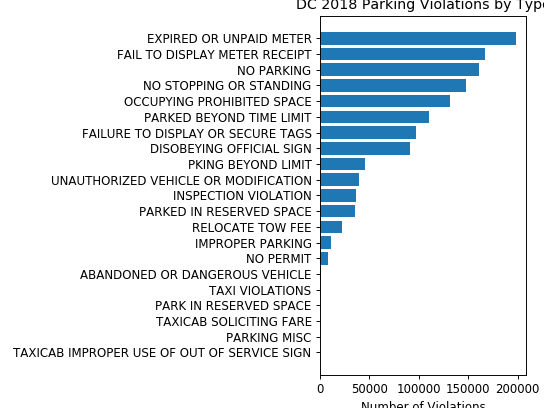

In [12]:
#Plot Violation by type Graph

plt.barh(Y,X)
plt.tight_layout()

plt.title("DC 2018 Parking Violations by Type")
plt.xlabel("Number of Violations")

plt.show()

plt.savefig("Output/2018 Violation_Type.png", bbox_inches="tight", dpi=500)
